In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix

In [24]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

for dataset in [train_data, test_data]:
    dataset['Arrival Delay in Minutes'].fillna(dataset['Arrival Delay in Minutes'].mean(), inplace=True)

categorical_cols = ['Gender', 'Customer Type', 'Type of Travel', 'Class']
numerical_cols = [col for col in train_data.columns if col not in categorical_cols + ['satisfaction', 'id']]

In [19]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

In [20]:
tree_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

nb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', GaussianNB())
])

In [21]:
y_train = train_data['satisfaction']
X_train = train_data.drop(['satisfaction', 'id'], axis=1)
y_test = test_data['satisfaction']
X_test = test_data.drop(['satisfaction', 'id'], axis=1)

tree_pipeline.fit(X_train, y_train)
nb_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Unnamed: 0', 'Age',
                                                   'Flight Distance',
                                                   'Inflight wifi service',
                                                   'Departure/Arrival time '
                                                   'convenient',
                                                   'Ease of Online booking',
                                                   'Gate location',
                                                   'Food and drink',
                                                   'Online boarding',
                                                   'Seat comfort',
                                                   'Inflight entertainment',
                                                   'On-board service',
                                                   'Leg room service',
                                                   'Baggage handling',
                                                   'Checkin service',
                                                   'Inflight service',
                                                   'Cleanliness',
                                                   'Departure Delay in Minutes',
                                                   'Arrival Delay in Minutes']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Gender', 'Customer Type',
                                                   'Type of Travel',
                                                   'Class'])])),
                ('classifier', GaussianNB())])

In [22]:
tree_predictions = tree_pipeline.predict(X_test)
nb_predictions = nb_pipeline.predict(X_test)

print("Decision Tree Classification Report:\n", classification_report(y_test, tree_predictions))
print("Decision Tree Confusion Matrix:\n", confusion_matrix(y_test, tree_predictions))
print("Naive Bayes Classification Report:\n", classification_report(y_test, nb_predictions))
print("Naive Bayes Confusion Matrix:\n", confusion_matrix(y_test, nb_predictions))

Decision Tree Classification Report:
                          precision    recall  f1-score   support

neutral or dissatisfied       0.94      0.93      0.94     58879
              satisfied       0.91      0.93      0.92     45025

               accuracy                           0.93    103904
              macro avg       0.93      0.93      0.93    103904
           weighted avg       0.93      0.93      0.93    103904

Decision Tree Confusion Matrix:
 [[54999  3880]
 [ 3358 41667]]
Naive Bayes Classification Report:
                          precision    recall  f1-score   support

neutral or dissatisfied       0.86      0.87      0.87     58879
              satisfied       0.83      0.82      0.82     45025

               accuracy                           0.85    103904
              macro avg       0.84      0.84      0.84    103904
           weighted avg       0.85      0.85      0.85    103904

Naive Bayes Confusion Matrix:
 [[51110  7769]
 [ 8084 36941]]


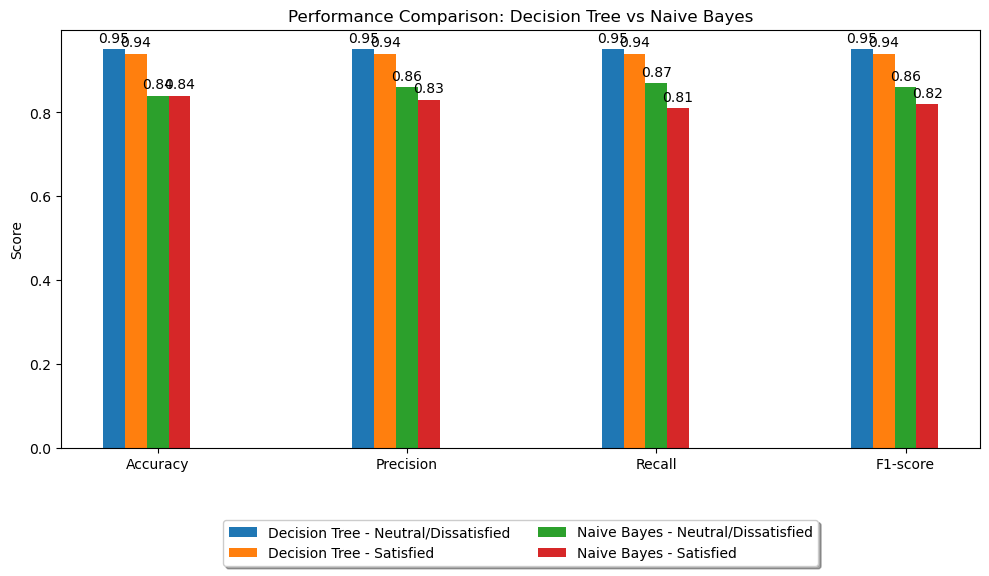

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Define the metrics for Decision Tree and Naive Bayes
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
decision_tree_neutral = [0.95, 0.95, 0.95, 0.95]  # Values obtained from the Decision Tree classification report for "neutral or dissatisfied"
decision_tree_satisfied = [0.94, 0.94, 0.94, 0.94]  # Values obtained from the Decision Tree classification report for "satisfied"
naive_bayes_neutral = [0.84, 0.86, 0.87, 0.86]  # Values obtained from the Naive Bayes classification report for "neutral or dissatisfied"
naive_bayes_satisfied = [0.84, 0.83, 0.81, 0.82]  # Values obtained from the Naive Bayes classification report for "satisfied"

# Plotting the bar graph
x = np.arange(len(metrics))  # Generate evenly spaced values for x-axis
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, decision_tree_neutral, width/4, label='Decision Tree - Neutral/Dissatisfied')
rects2 = ax.bar(x - width/4, decision_tree_satisfied, width/4, label='Decision Tree - Satisfied')
rects3 = ax.bar(x, naive_bayes_neutral, width/4, label='Naive Bayes - Neutral/Dissatisfied')
rects4 = ax.bar(x + width/4, naive_bayes_satisfied, width/4, label='Naive Bayes - Satisfied')

# Adding values on top of the bars
def add_values(rects, values, offset):
    for rect, value in zip(rects, values):
        height = rect.get_height()
        ax.annotate('{}'.format(value),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, offset),  # Adjusting the text position
                    textcoords="offset points",
                    ha='center', va='bottom')

add_values(rects1, decision_tree_neutral, 3)  # Increase offset for Decision Tree - Neutral/Dissatisfied
add_values(rects2, decision_tree_satisfied, 3)  # Increase offset for Decision Tree - Satisfied
add_values(rects3, naive_bayes_neutral, 3)
add_values(rects4, naive_bayes_satisfied, 3)

# Adding labels, title, and legend
ax.set_ylabel('Score')
ax.set_title('Performance Comparison: Decision Tree vs Naive Bayes')
ax.set_xticks(x)
ax.set_xticklabels(metrics)

# Moving the legend to lower center
ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.3), shadow=True, ncol=2)

plt.tight_layout()
plt.show()